# Fashion-MNIST Using OpenAI's ChatGPT
Sixth in this series. Coloring the prediction tiles using only the OpenAI ChatGPT.

In [1]:
# Import TensorFlow and other libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Split the training data into training and validation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

# Normalize the pixel values
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [32]:
# Import the layers you need
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add
from tensorflow.keras.models import Model

# Define the input tensor
inputs = Input(shape=(28, 28, 1))

# Define the first convolutional layer
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)

# Define the first pooling layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Define the second convolutional layer
y = Conv2D(64, (3, 3), padding='same', activation='relu')(x)

# Define the second pooling layer
y = MaxPooling2D((1, 1), padding='same')(y)

# Add the output of the first convolutional layer to the output of the second convolutional layer
z = Add()([x, y])

# Define the third convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fourth convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fifth convolutional layer with more kernels
z = Conv2D(256, (3, 3), activation='relu')(z)

# Define the third pooling layer
z = MaxPooling2D((2, 2))(z)

# Flatten the output of the third pooling layer
z = Flatten()(z)

# Define the dense layer
z = Dense(512, activation='relu')(z)

# Define the output layer
outputs = Dense(10, activation='softmax')(z)

# Define the model
model = Model(inputs, outputs)


In [3]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(x_train, y_train, verbose=2, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


2022-12-11 21:40:30.801688: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2022-12-11 21:40:30.955768: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2022-12-11 21:40:32.172878: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-12-11 21:40:33.605440: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 - 12s - loss: 0.5242 - accuracy: 0.8100 - val_loss: 0.4063 - val_accuracy: 0.8517 - 12s/epoch - 7ms/step
Epoch 2/20
1719/1719 - 9s - loss: 0.3357 - accuracy: 0.8784 - val_loss: 0.3323 - val_accuracy: 0.8780 - 9s/epoch - 5ms/step
Epoch 3/20
1719/1719 - 9s - loss: 0.2831 - accuracy: 0.8966 - val_loss: 0.3202 - val_accuracy: 0.8827 - 9s/epoch - 5ms/step
Epoch 4/20
1719/1719 - 9s - loss: 0.2487 - accuracy: 0.9104 - val_loss: 0.2656 - val_accuracy: 0.9025 - 9s/epoch - 5ms/step
Epoch 5/20
1719/1719 - 9s - loss: 0.2188 - accuracy: 0.9185 - val_loss: 0.2422 - val_accuracy: 0.9133 - 9s/epoch - 5ms/step
Epoch 6/20
1719/1719 - 9s - loss: 0.1935 - accuracy: 0.9292 - val_loss: 0.2418 - val_accuracy: 0.9152 - 9s/epoch - 5ms/step
Epoch 7/20
1719/1719 - 9s - loss: 0.1743 - accuracy: 0.9351 - val_loss: 0.2291 - val_accuracy: 0.9168 - 9s/epoch - 5ms/step
Epoch 8/20
1719/1719 - 9s - loss: 0.1534 - accuracy: 0.9429 - val_loss: 0.2515 - val_accuracy: 0.9159 - 9s/epoch - 5ms/step
Epoch 9/20
1719/1

In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.41450831294059753
Test accuracy: 0.9157000184059143


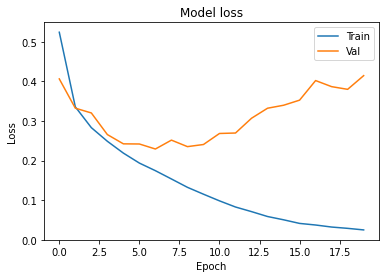

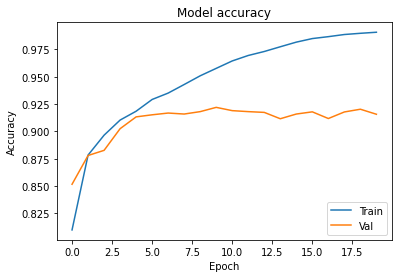

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


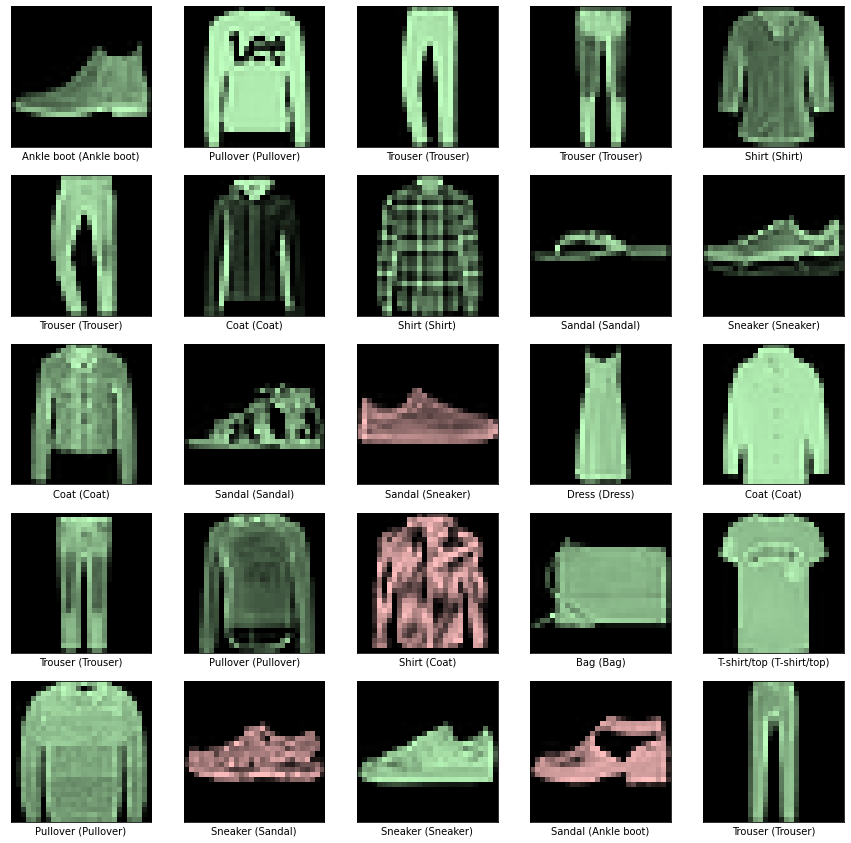

In [31]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Plot the first 25 test images with their predicted labels
plt.figure(figsize=(15,15))  # Set the figure size to 15 inches by 15 inches
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Create the image tensor
    if predictions.argmax(axis=1)[i] == y_test[i]:
        # If the prediction is correct, create a green tinted image
        image = np.dstack([x_test[i] * 0.75, x_test[i] * 1.0, x_test[i] * 0.75])
    else:
        # If the prediction is incorrect, create a red tinted image
        image = np.dstack([x_test[i] * 1.0, x_test[i] * 0.75, x_test[i] * 0.75])

    plt.imshow(image)
    plt.xlabel("{} ({})".format(class_names[predictions.argmax(axis=1)[i]],
                                  class_names[y_test[i]]))
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert the true labels and predictions to class labels
true_labels = y_test
pred_labels = predictions.argmax(axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true=true_labels, y_pred=pred_labels)


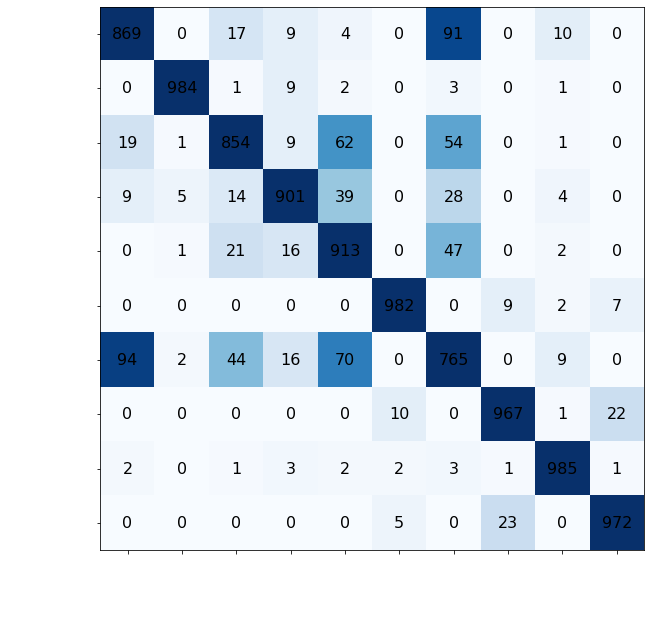

In [19]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap with custom color scaling
im = ax.imshow(conf_matrix, cmap='Blues', vmin=0, vmax=100)

# Add labels to the plot
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontdict={'color': 'white', 'size': 16})
ax.set_yticklabels(class_names, fontdict={'color': 'white', 'size': 16})

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over the data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=16)

# Show the plot
plt.show()


(Deep Voice) Previously on OpenAI's ChatGPT Coding Challenge:
- 01 - 87%
- 02 - 90%
- 03 - 91%
- 04 - 92%
- 05 - Confusion Matrix
- 06 - Colored Prediction Tiles  <---- You are here

I had to get pretty direct with it and make actual code suggestions for it to use.

"ok this ran without errors but doesn't look good. Can you please do something similar to:

image = np.dstack([x_test[i] * 1.0, x_test[i] * 0.75, x_test[i] * 0.75])

This would be for the red case. For the green case, it would be similar but multiply the red and blue channel by 0.75, and the green channel by 1.0 in that green gas."